Университет ИТМО. Высшая школа цифровой культуры. 

Выпускной проект по курсу "Аналитик данных (Data Scientist)".


Автор: Боровой Алексей Андреевич


2022г.

# 0 Импорт библиотек



In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.utils import shuffle
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score
%precision %.4f
import warnings
warnings.filterwarnings('ignore')

# 1 Описание задачи

В данном блокноте будут разобраны следующие эпизоды работы с данными:


-   Ознакомление с данными;
-   Чистка данных;
-   Создание моделей машинного обучения для мультиклассовой классификации;
-   Сравнение моделей и их метрик;
-   Итоги и выводы.


# 2 Ознакомление с данными

В распоряжении имеется база данных небольшого производства и магазина запчастей для экскаваторов в г. Иваново за 2022 год. База данных ведется с начала года вручную в виде .xls таблицы. Соответственно, данные "грязные", корректность заполнения данных не подтверждена. База данных подлежит проверке и чистке.

## 2.1 Загрузка данных

Загружаем таблицу и преобразуем её в датасет.

In [2]:
#!gdown 1Mmx8Vgy1l19LRXPYDP_JxBcKvWHudDjq #В случае, если приложенный к блокноту файл окажется поврежден - можно загрузить данные с Гугл-диска.

In [3]:
data = pd.read_excel('data_mk1.xlsx')

Проверим, как датасет распознался. Для этого выведем первые 10 строк.

In [4]:
data.head(10)

,Дата,Источник,№,Название компании,Регион (город),Тип запчасти,Part №,Кол-во,Тип клиента,TG №,Примечание
0,10.01.2022,e-mail,1.0,Матичи,Красноярск,Шайба,4219932,2.0,Посредник,NaN,NaN
1,10.01.2022,e-mail,1.0,Матичи,Красноярск,Шайба,4219933,2.0,Посредник,NaN,NaN
2,10.01.2022,e-mail,1.0,Матичи,Красноярск,Сальник,4258580,2.0,Посредник,NaN,NaN
3,10.01.2022,e-mail,1.0,Матичи,Красноярск,Втулка,4638802,2.0,Посредник,BZ018,NaN
4,10.01.2022,e-mail,1.0,Матичи,Красноярск,Втулка,4640461,2.0,Посредник,BZ017,NaN
5,10.01.2022,e-mail,1.0,Матичи,Красноярск,Шайба,4642173,1.0,Посредник,NaN,NaN
6,10.01.2022,e-mail,1.0,Матичи,Красноярск,Палец,8100946,1.0,Посредник,PZ177,NaN
7,10.01.2022,e-mail,1.0,Матичи,Красноярск,Палец,8101379,2.0,Посредник,PZ208,NaN
8,10.01.2022,e-mail,2.0,Интеркам,NaN,Деталь,19M-13-23360,1.0,Посредник,NaN,NaN
9,10.01.2022,e-mail,2.0,Интеркам,NaN,Втулка,207-70-32150,2.0,Посредник,BU030,NaN


Видим, что библиотека "pandas" смогла корректно прочитать файл. Выведем некоторые характеристики датасета.

In [5]:
data.shape #размерность датасета (строки х столбцы)

(17634, 11)

## 2.2 Вывод характеристик датасета

Выведем с сводную ведомость характеристик столбцов по датасету.

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17634 entries, 0 to 17633
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Дата               17634 non-null  object 
 1   Источник           17634 non-null  object 
 2   №                  17634 non-null  float64
 3   Название компании  17634 non-null  object 
 4   Регион (город)     293 non-null    object 
 5   Тип запчасти       17554 non-null  object 
 6   Part №             17553 non-null  object 
 7   Кол-во             17533 non-null  object 
 8   Тип клиента        1166 non-null   object 
 9   TG №               8402 non-null   object 
 10  Примечание         680 non-null    object 
dtypes: float64(1), object(10)
memory usage: 1.5+ MB


## 2.3 Просмотр всех значений

"С высоты птичьего полета"© осмотрим значения каждого столбца датасета. Для этого выведем перечень уникальных значений в каждом столбце.

In [7]:
for i in data.columns:
    print(f' {i} :\n {data[i].unique()}')
    print('=========================================================================')

 Дата :
 ['10.01.2022' '11.01.2022' '12.01.2022' '13.01.2022' '14.01.2022'
 '17.01.2022' '18.01.2022' '19.01.2022' '20.01.2022' '21.01.2022'
 '24.01.2022' '25.01.2022' '26.01.2022' '27.01.2022' '28.01.2022'
 '31.01.2022' '01.02.2022' '02.02.2022' '03.02.2022' '04.02.2022'
 '07.02.2022' '08.02.2022' '09.02.2022' '10.02.2022' '11.02.2022'
 '14.02.2022' '15.02.2022' '16.02.2022' '17.02.2022' '18.02.2022'
 '21.02.2022' '22.02.2022' '23.02.2022' '25.02.2022' '28.02.2022'
 '01.03.2022' '02.03.2022' '03.03.2022' '04.03.2022' '05.03.2022'
 '09.03.2022' '10.03.2022' '11.03.2022' '14.03.2022' '15.03.2022'
 '16.03.2022' '17.03.2022' '18.03.2022' '21.03.2022' '22.03.2022'
 '23.03.2022' '24.03.2022' '25.03.2022' '28.03.2022' '29.03.2022'
 '30.03.2022' '31.03.2022' '01.04.2022' '04.04.2022' '05.04.2022'
 '06.04.2022' '07.04.2022' '08.04.2022' '11.04.2022' '12.04.2022'
 '13.04.2022' '14.04.2022' '15.04.2022' '18.04.2022' '19.04.2022'
 '20.04.2022' '21.04.2022' '22.04.2022' '25.04.2022' '26.04.2022'
 

## 2.4 Итоги осмотра датасета

Первичный грубый анализ показывает следующее:
 - Большое количество пропусков;
 - Имеются дубликаты строк;
 - Имеется много значений, одинаковых по смыслу, но написанных в разном регисте (издержки ручного ввода);
 - Типы данных определены как 'object'.
 
С данными в таком виде работать нельзя, необходимо их очистить.

# 3 Чистка данных

Приступим к очистке данных.


## 3.1 Работа с наименованием столбцов и типами данных

Для начала переименуем столбцы на английский язык. Это не обязательно, но так привычнее.

In [8]:
columns = ['date', 'sourse', 'number', 'company_name', 'city', 'type_of_spare_part', 'part_num', 'count', 'client_type', 'tg_№', 'note']
data.columns = columns
data.head()

,date,sourse,number,company_name,city,type_of_spare_part,part_num,count,client_type,tg_№,note
0,10.01.2022,e-mail,1.0,Матичи,Красноярск,Шайба,4219932,2.0,Посредник,NaN,NaN
1,10.01.2022,e-mail,1.0,Матичи,Красноярск,Шайба,4219933,2.0,Посредник,NaN,NaN
2,10.01.2022,e-mail,1.0,Матичи,Красноярск,Сальник,4258580,2.0,Посредник,NaN,NaN
3,10.01.2022,e-mail,1.0,Матичи,Красноярск,Втулка,4638802,2.0,Посредник,BZ018,NaN
4,10.01.2022,e-mail,1.0,Матичи,Красноярск,Втулка,4640461,2.0,Посредник,BZ017,NaN


Обработаем типы данных в колонках датасета.

In [9]:
data.dtypes

date                   object
sourse                 object
number                float64
company_name           object
city                   object
type_of_spare_part     object
part_num               object
count                  object
client_type            object
tg_№                   object
note                   object
dtype: object

Приведем числовые типы данных в колонках к корректному виду.

In [10]:
for i in ['number', 'count']:
  try:
    data[i] = pd.to_numeric(data[i])
    print(f'For data["{i}"] convertation is ok.')
  except:
    print(f'For data["{i}"] - Value error.')

For data["number"] convertation is ok.
For data["count"] - Value error.



Не сработало, после запуска процедуры без обработки исключений цикл выпал в ошибку, в которой говорится, что ошибка в строке 7777, в ней находится нечисловое значение. Проверяем.

In [11]:
data.iloc[7777]

date                     18.05.2022
sourse                    Повторная
number                        916.0
company_name          Титан Техника
city                            NaN
type_of_spare_part         О-кольцо
part_num                  4102191.0
count                        100/48
client_type                     NaN
tg_№                            NaN
note                            NaN
Name: 7777, dtype: object

Видно, что в столбце 'count' значение "100/48". Откорректируем.

In [12]:
data.loc[7777,'count'] = 100

Запустим цикл еще раз.

In [13]:
for i in ['number', 'count']:
  try:
    data[i] = pd.to_numeric(data[i])
    print(f'For data["{i}"] convertation is ok.')
  except:
    print(f'Value error.')

For data["number"] convertation is ok.
For data["count"] convertation is ok.


Удостоверимся, что числовые типы имеют соответствующий тип данных.

In [14]:
data.dtypes

date                   object
sourse                 object
number                float64
company_name           object
city                   object
type_of_spare_part     object
part_num               object
count                 float64
client_type            object
tg_№                   object
note                   object
dtype: object

Проделаем аналогичную процедуру для столбцов со строчными данными.

In [15]:
for i in ['sourse', 'company_name', 'city', 'type_of_spare_part', 'part_num', 'client_type', 'tg_№', 'note']:
  data[i] = data[i].astype("string")

Проверяем.

In [16]:
data.dtypes

date                   object
sourse                 string
number                float64
company_name           string
city                   string
type_of_spare_part     string
part_num               string
count                 float64
client_type            string
tg_№                   string
note                   string
dtype: object

И, наконец, приведем столбец с датой к удобному виду "гггг-мм-дд".

In [17]:
data['date'] = pd.to_datetime(data.date)

Проверим.

In [18]:
data['date'].head()

0   2022-10-01
1   2022-10-01
2   2022-10-01
3   2022-10-01
4   2022-10-01
Name: date, dtype: datetime64[ns]

In [19]:
data.dtypes #Конечная проверка всех типов.

date                  datetime64[ns]
sourse                        string
number                       float64
company_name                  string
city                          string
type_of_spare_part            string
part_num                      string
count                        float64
client_type                   string
tg_№                          string
note                          string
dtype: object

## 3.2 Удаление дубликатов


Проверим количество строк с дубликатами. Выведем список "индексов-дубликатов" и их общее количество.

In [20]:
data.loc[data.duplicated() == True].index

Int64Index([  108,   157,   163,   191,   217,   219,   225,   233,   235,
              239,
            ...
            17575, 17577, 17579, 17580, 17582, 17584, 17590, 17595, 17597,
            17618],
           dtype='int64', length=808)

Количество дубликатов показано в атрибуте 'length'.

При первичном осмотре, было замечено, что некоторые значения в столбцах со строчными значениями имели одинаковое значение, но разный регистр букв. Приведем все строчные значения к одному регистру (пусть это будет 'title').

In [21]:
for i in ['sourse', 'company_name', 'city', 'type_of_spare_part', 'part_num', 'client_type', 'tg_№', 'note']:
  data[i] = data[i].str.title()

Проверим значения в некоторых столбцах и пересчитаем дубликаты.

In [22]:
data.loc[data.duplicated() == True].index

Int64Index([  108,   157,   163,   191,   217,   219,   225,   233,   235,
              239,
            ...
            17575, 17577, 17579, 17580, 17582, 17584, 17590, 17595, 17597,
            17618],
           dtype='int64', length=812)

Как мы видим, значение 'length' увеличилось. 

Проверим на паре таких индексов, помеченных как дубликаты, действительно ли это дубликаты. Возьмем индексы 108 и 219 и их ближайшее окружение.

In [23]:
data.iloc[[107,108]]

,date,sourse,number,company_name,city,type_of_spare_part,part_num,count,client_type,tg_№,note
107,2022-11-01,E-Mail,13.0,Профессионал,Иваново,Шайба,Khv0287,1.0,<NA>,<NA>,<NA>
108,2022-11-01,E-Mail,13.0,Профессионал,Иваново,Шайба,Khv0287,1.0,<NA>,<NA>,<NA>


Видно, что дубликат это строка под индексом 108.
Проверим строку под индексом 219.

In [24]:
data.iloc[[217, 218, 219]]

,date,sourse,number,company_name,city,type_of_spare_part,part_num,count,client_type,tg_№,note
217,2022-01-13,E-Mail,24.0,Балт-Авто,Санкт-Петербург,Сальник,14503887,2.0,Посредник,<NA>,<NA>
218,2022-01-13,E-Mail,24.0,Балт-Авто,Санкт-Петербург,Сальник,14503887,4.0,Посредник,<NA>,<NA>
219,2022-01-13,E-Mail,24.0,Балт-Авто,Санкт-Петербург,Сальник,14503887,2.0,Посредник,<NA>,<NA>


Действительно, строка с индексом 219 повторяет строку с индексом 217.

Сбросим все дубликаты из датафрейма.

In [25]:
data.drop_duplicates(inplace=True)

Проверим новую размерность датасета.

In [26]:
data.shape

(16822, 11)

Количество строк уменьшилось, дубликаты удалены.

## 3.3 Работа с пропусками

Проверим датасет на "N/A"-значения (т.е. пропуски).

In [27]:
data.isna().sum()

date                      0
sourse                    0
number                    0
company_name              0
city                  16552
type_of_spare_part       80
part_num                 68
count                   100
client_type           15741
tg_№                   8784
note                  16171
dtype: int64

In [28]:
data.isnull().sum() #Есть ли разница между методами .isna() и .isnull()? Оказывается - нет.

date                      0
sourse                    0
number                    0
company_name              0
city                  16552
type_of_spare_part       80
part_num                 68
count                   100
client_type           15741
tg_№                   8784
note                  16171
dtype: int64

Из выборки видно, что больше всего пропусков в столбцах "city", "client_type" и "note". Заполнять пропуски планируется исходя из смежных столбцов (например, "company_name" может указать "city" и "client_type"), а столбец "note" (если он не обладает важной информацией), можно удалить.

Перед тем, как удалить столбец 'note', посмотрим его уникальные значения и их количество, возможно их можно переместить в другие столбцы.

In [29]:
with pd.option_context('display.max_rows', None):
    print(data['note'].value_counts())

Pu010     42
Pu005     41
Pu017     37
Pu002     31
Pu015     30
Pf04      30
Pu012     27
Pu004     26
Pu008     24
Pu001     20
Pu018     18
Pu007     17
Pf08      15
Pf01      14
Pu013     14
Pu002M    14
Pf02      14
Pu009     13
Pu006     11
Pu016     10
Pu014      9
Pf03       9
Pu003      8
Pu020      8
Pf07       7
Pu021      7
Pf05       5
Bu018      4
Bu034      4
Bu017      4
Bv006      3
Bu009      3
Bu058      3
Pu019      3
Bc028      3
Pf06       3
Bu012      2
Br101      2
Bu010      2
Br011      2
Pr103      2
Pr154      2
Pd114      2
Bc004      2
Bu117      2
Pd128      2
Bu064      2
Pp212      2
Pd153      2
Pv126      2
Bu033P     1
Pz263      1
Pz136      1
Bz033      1
Pp241      1
Pp242      1
Pz105      1
Bu025P     1
Bj003      1
Pr208      1
Pr207      1
Br010      1
Pc110      1
Br012      1
Pc114      1
Pc123      1
Bu038      1
Pp119      1
Bu023      1
Bu049      1
Bu006      1
Bu025      1
Pz350      1
Pz262      1
Pz221      1
Pz122      1
Pr443      1

С высокой долей вероятности это внутренние коды запчастей (которые размещены в столбце 'tg_№'). Переместим их туда (если соответствующая ячейка не занята).

Перед заполнением сделаем выборочный разведочный анализ столбцов.

In [30]:
data['note'].nunique() #Сосчитаем количество уникальных значений в столбце 'note'.

142

In [31]:
data['tg_№'].nunique() #Сосчитаем количество уникальных значений в столбце 'tg_№'.

1861

In [32]:
data['note'].unique() #В очередной раз вглянем на список уникальных значений.

<StringArray>
[   <NA>,  'Pf08',  'Pf04', 'Pu017', 'Pu018', 'Pu009',  'Pf02', 'Pu012',
 'Pu010', 'Pu004',
 ...
 'Pp214', 'Pp229', 'Pp213', 'Bu012', 'Bu015', 'Bj006', 'Bu007', 'Bu011',
 'Pr104', 'Pr107']
Length: 143, dtype: string

Проверим, какое значение в стообце "tg_№" соотсветствует, например, значению (коду детали) 'Pu017'.

In [33]:
data.loc[data['note']=='Pu017'].index #Определим индекс(ы) строк(и) с таким значением в столбце "note".

Int64Index([  341,   707,   946,  2897,  3155,  3710,  4394,  4441,  5654,
             5862,  5901,  6010,  6021,  6189,  6353,  7251,  7334,  7596,
             7773,  8150,  8189,  8295,  9152,  9836, 10093, 10107, 11279,
            11338, 11393, 12077, 12308, 12565, 12615, 12905, 13298, 13438,
            13611],
           dtype='int64')

Взглянем на строки 707 и 3155.

In [34]:
data.iloc[[707, 3155]]

,date,sourse,number,company_name,city,type_of_spare_part,part_num,count,client_type,tg_№,note
754,2022-01-19,E-Mail,53.0,Балт-Авто,<NA>,Палец,11432004,1.0,Посредник,Pv209,<NA>
3362,2022-04-03,Повторная,301.0,Нм Компани,<NA>,Втулка,110-00158,1.0,<NA>,Bu034,<NA>


Во-первых, видим, что в столбце 'note' значения  <N\A>, во-вторых, индексы не те, по которым был поиск.

Ошибка кроется в том, что после преобразований датасета (удаление дубликатов), не был произведен сброс индексов. 

Исправим это.

In [35]:
data.reset_index(drop=True, inplace=True)

 Проверим еще раз:

In [36]:
data.loc[data['note']=='Pu017'].index #Найдем новые пересчитанные индексы.

Int64Index([  330,   674,   876,  2719,  2960,  3493,  4145,  4192,  5358,
             5562,  5594,  5701,  5710,  5869,  6027,  6874,  6956,  7207,
             7361,  7733,  7772,  7869,  8692,  9324,  9576,  9589, 10716,
            10775, 10830, 11489, 11717, 11966, 12011, 12290, 12658, 12796,
            12964],
           dtype='int64')

In [37]:
data.iloc[[674, 2960]] #После удаления дубликатов, индексы ушли в меньшую сторону (найдем ближайшие к прежним).

,date,sourse,number,company_name,city,type_of_spare_part,part_num,count,client_type,tg_№,note
674,2022-01-19,Рассылка,51.0,Спецтехстрой,<NA>,Палец,61Na-40072,1.0,<NA>,Pr119,Pu017
2960,2022-01-03,Повторная,276.0,Уралпромтрак,<NA>,Палец,61Na-40072,1.0,<NA>,Pr119,Pu017


Все корректно отобразилось.



Найдем пару значений, когда 'note' имеет заполненную ячейку, а 'tg_№' имеет пропуск - эта пара будет нужна далее для проверки корректности выполнения операции заполнения пропусков.

In [38]:
data.loc[data['note']=='Pr107'].index

Int64Index([6740], dtype='int64')

In [39]:
data.iloc[6740] #Запомним этот индекс.

date                  2022-06-05 00:00:00
sourse                          Повторная
number                              769.0
company_name                           Чл
city                                 <NA>
type_of_spare_part                  Палец
part_num                       61N6-11112
count                                 1.0
client_type                          <NA>
tg_№                                 <NA>
note                                Pr107
Name: 6740, dtype: object

Теперь произведем операцию заполнения незанятых строк.

In [40]:
data['tg_№'].fillna(data['note'], inplace=True) #В столбец "tg_№ вставляем соответствующие значения из столбца "note" при условии, что ячейка в столбце "tg_№" имеет значение <N/A>.

  Проверим на нашем запомненном индексе (когда 'note' имел значение, а 'tg_№' имел пропуск).

In [41]:
data.iloc[6740]

date                  2022-06-05 00:00:00
sourse                          Повторная
number                              769.0
company_name                           Чл
city                                 <NA>
type_of_spare_part                  Палец
part_num                       61N6-11112
count                                 1.0
client_type                          <NA>
tg_№                                Pr107
note                                Pr107
Name: 6740, dtype: object

Значенич из столбца  'note'  перезаписались в свободные значения столбца 'tg_№'. Теперь столбец 'note' можно удалить.

In [42]:
data.drop('note', axis=1, inplace=True) #Удаляем столбец с перезаписью датасета.

Проверим.

In [43]:
data.head()

,date,sourse,number,company_name,city,type_of_spare_part,part_num,count,client_type,tg_№
0,2022-10-01,E-Mail,1.0,Матичи,Красноярск,Шайба,4219932,2.0,Посредник,<NA>
1,2022-10-01,E-Mail,1.0,Матичи,Красноярск,Шайба,4219933,2.0,Посредник,<NA>
2,2022-10-01,E-Mail,1.0,Матичи,Красноярск,Сальник,4258580,2.0,Посредник,<NA>
3,2022-10-01,E-Mail,1.0,Матичи,Красноярск,Втулка,4638802,2.0,Посредник,Bz018
4,2022-10-01,E-Mail,1.0,Матичи,Красноярск,Втулка,4640461,2.0,Посредник,Bz017


После некоторых преобразований датасета, в столбце 'tg_№' все равно имеются пропуски, сосчитаем их.

In [44]:
data.isna().sum()

date                      0
sourse                    0
number                    0
company_name              0
city                  16552
type_of_spare_part       80
part_num                 68
count                   100
client_type           15741
tg_№                   8644
dtype: int64

Пропусков стало меньше примерно на 100 шт. Вариантов решения этой проблемы несколько: 1) Радикально удалить все строки с пропусками 2) Попробовать восстановить значения из соседних столбцов (например из номера партии - 'part_num').

Попробуем второй вариант.

Сформируем словарь из значений {номер партии:внутренний номер запчасти}.

In [45]:
dict_tg_part_num = pd.Series(data['tg_№'].values,index=data['part_num']).to_dict()
dict_tg_part_num

{'4219932': <NA>,
 '4219933': <NA>,
 '4258580': <NA>,
 '4638802': 'Bz018',
 '4640461': 'Bz017',
 '4642173': <NA>,
 '8100946': 'Pz177',
 '8101379': 'Pz208',
 '19M-13-23360': <NA>,
 '207-70-32150': 'Bu029',
 '207-70-33160': 'Bu029',
 '207-70-61521': 'Bu002',
 '207-70-72120': '90X105X8',
 '207-70-72341': 'Bu110',
 '206-70-55270': 'Pp107',
 ' 067.55.11.004-01': <NA>,
 '067.55.11.004': <NA>,
 '16.65Г.019': <NA>,
 'А120.34.14.001': <NA>,
 'А120.34.14.001-01': <NA>,
 'Бкт-0100-0009': <NA>,
 'Гост 6402-70 20.65Г.019': <NA>,
 'М16-6Н.5.019(S24)': <NA>,
 'М20-6Н.5.019(S30)': <NA>,
 'Пкт-2.01.00.005': <NA>,
 '0 332 002 160 (0332002160)': <NA>,
 '0707301Аа9': <NA>,
 '07102-20607': <NA>,
 '120-10-31120': <NA>,
 '207-62-54680': <NA>,
 '423-847-1111': <NA>,
 '6156-11-7220': <NA>,
 '6156-11-8810': <NA>,
 '6219-71-1150': <NA>,
 '6219-71-1160': <NA>,
 '707401009': <NA>,
 'Р910-062060': <NA>,
 'F 00М А45 251': <NA>,
 'S018-33200W': <NA>,
 'S206-33100V': <NA>,
 '14551182': <NA>,
 '22905123 (21019945)': <N

In [46]:
len(dict_tg_part_num)

8664

In [47]:
data['tg_№'] = data['tg_№'].fillna(data['part_num'].map(dict_tg_part_num))

In [48]:
data['tg_№'].isna().sum()

7319

Пропусков стало меньше примерно на тысячу с лишним.

Ради эксперимента заполним значения 'tg_№' нулями, чтобы не удалять все строки с <N/A>.

In [49]:
data['tg_№'].fillna('0', inplace=True) 

In [50]:
data.isna().sum()

date                      0
sourse                    0
number                    0
company_name              0
city                  16552
type_of_spare_part       80
part_num                 68
count                   100
client_type           15741
tg_№                      0
dtype: int64

Аналогично проделаем со столбцами 'type_of_spare_part', 'part_num', 'count'.

In [51]:
for column in ['type_of_spare_part', 'part_num']: #Отдельно заполняем строчными нулями.
  data[column].fillna('0', inplace=True)

In [52]:
data['count'].fillna(0, inplace=True) #Заполняем цифровыми нулями.

Проверим на случайных индексах.

In [53]:
data.iloc[[4, 543, 2233, 6585, 10456, 12345, 16543]] 

,date,sourse,number,company_name,city,type_of_spare_part,part_num,count,client_type,tg_№
4,2022-10-01,E-Mail,1.0,Матичи,Красноярск,Втулка,4640461,2.0,Посредник,Bz017
543,2022-01-18,E-Mail,39.0,Снабжение Иркутск,<NA>,Рвд,31Q7-13486,1.0,Посредник,0
2233,2022-02-16,Повторная,211.0,Матичи,<NA>,Втулка,17M-21-25130,2.0,<NA>,0
6585,2022-05-05,Повторная,757.0,Пром Техника,<NA>,Сальник,4067902.0,2.0,<NA>,80X95X6
10456,2022-07-21,Повторная,1333.0,Ип Лобов,<NA>,Палец,234-3930,1.0,<NA>,Pc114
12345,2022-08-22,Повторная,1525.0,Сектор М,<NA>,Палец,14550901,1.0,<NA>,Pv126
16543,2022-11-15,Повторная,2264.0,Титан Техника,<NA>,Втулка,21N-70-32550,4.0,<NA>,Bp012


Выведем статистику по пропускам.

In [54]:
data.isna().sum()

date                      0
sourse                    0
number                    0
company_name              0
city                  16552
type_of_spare_part        0
part_num                  0
count                     0
client_type           15741
tg_№                      0
dtype: int64

Остались 2 столбца с огромным количеством пропусков - 'city' и 'client_type'. Посмотрим, что с ними можно сделать.

In [55]:
data[['city', 'client_type']].nunique() #Количество уникальных значений

city           4
client_type    2
dtype: int64

Видимо во время составления таблицы сотрудник или забыл, или не стал заполнять эти столбцы. (После допроса сотрудника он признался, что так и было).


Обновим индексы.

In [56]:
data.reset_index(drop=True, inplace=True)

У хозяина производства удалось выпросить файл с перечнем юр.лиц и их адресами. Необходимо вытащить из таблицы наименование организации и город. Все организации, не попавшие в данный список, будут размечены как г. Иваново.

In [57]:
#!gdown 1WmJC9ZqKOQPmJoiqwCCc7RXcI_dT0xCj #В случае, если приложенный к блокноту файл окажется поврежден - можно загрузить данные с Гугл-диска.

Создадим новый датасет и осмотрим его.

In [58]:
company_list = pd.read_excel('company-list.xlsx')

In [59]:
company_list.head(5)

,Наименование,Тип контрагента,Полное наименование,Юридический адрес,ИНН,КПП,Банк,Расчетный счет
0,"ООО ""ПОЛИ ГАРАНТ""",Юридическое лицо,"ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ ""ПОЛИ...","344030, Россия, г Ростов-на-Дону, ул Горсоветс...",6167102748,616701001.0,"ПАО КБ ""ЦЕНТР-ИНВЕСТ"", Г. Ростов-на-Дону",40702810900000016201
1,"ООО ""ТД БАЛТ-АВТО""",Юридическое лицо,"ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ ""ТД Б...","196626, Россия, г Санкт-Петербург, поселок Шуш...",7820059332,782001001.0,"АО ""ТИНЬКОФФ БАНК"", Г. Москва",40702810010000263561
2,"ООО ""ПРОГРЕСС""",Юридическое лицо,"ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ ""ПРОГ...","660041, Россия, г Красноярск, ул Академика Кир...",2463102250,246301001.0,"СИБИРСКИЙ ФИЛИАЛ АО КБ ""МОДУЛЬБАНК"", Г. Новоси...",40702810021510000120
3,ИП Тарасов (ЛИГА ГРУПП),Индивидуальный предприниматель,Индивидуальный предприниматель Тарасов Андрей ...,"422951, Россия, г Чистополь",165700321923,NaN,"АО ""АЛЬФА-БАНК"", Г. Москва",30302810900000001006
4,"ООО ""ТЕХИМПОРТ""",Юридическое лицо,"ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ ""ТЕХИ...","620050, Россия, г Екатеринбург, ул Расточная, ...",6678102794,667801001.0,"ТОЧКА ПАО БАНКА ""ФК ОТКРЫТИЕ"", Г. Москва",40702810502500038752


Из всех столбцов нам нужны только 2: 

1.   "Наименование", 
2. "Юридический адрес".


In [60]:
company_list = company_list[['Наименование', 'Юридический адрес']]

In [61]:
columns = ['company_name', 'adress']
company_list.columns = columns

Проверим датасет.

In [62]:
company_list.head()

,company_name,adress
0,"ООО ""ПОЛИ ГАРАНТ""","344030, Россия, г Ростов-на-Дону, ул Горсоветс..."
1,"ООО ""ТД БАЛТ-АВТО""","196626, Россия, г Санкт-Петербург, поселок Шуш..."
2,"ООО ""ПРОГРЕСС""","660041, Россия, г Красноярск, ул Академика Кир..."
3,ИП Тарасов (ЛИГА ГРУПП),"422951, Россия, г Чистополь"
4,"ООО ""ТЕХИМПОРТ""","620050, Россия, г Екатеринбург, ул Расточная, ..."


In [63]:
company_list.shape #Размерность.

(91, 2)

Заберем из юридического адреса название города, а из названия компании только название.

In [64]:
company_list['city'] = company_list['adress'].str.split(',').str[2] #Делаем сплит строки по символу "," и забираем в столбец "city" каждый третий элемент списка.

In [65]:
company_list['name'] = company_list['company_name'].str.split('"').str[1]

In [66]:
company_list['name']

0       ПОЛИ ГАРАНТ
1      ТД БАЛТ-АВТО
2          ПРОГРЕСС
3               NaN
4         ТЕХИМПОРТ
          ...      
86    АМКОДОР-ОПТИМ
87             НСМК
88      СПЕЦТЕХСНАБ
89    ГИДРАВЛИКА СК
90              NaN
Name: name, Length: 91, dtype: object

In [67]:
company_list['city']

0       г Ростов-на-Дону
1      г Санкт-Петербург
2           г Красноярск
3            г Чистополь
4         г Екатеринбург
             ...        
86     г Санкт-Петербург
87     г Нижний Новгород
88        г Екатеринбург
89             г Воронеж
90      г Ростов-на-Дону
Name: city, Length: 91, dtype: object

В рабочем датасете фигурирует только название города, без "г". Уберем эту букву.

In [68]:
for n in range(len(company_list)):
    company_list['city'][n] = company_list['city'][n].replace('г ', '')

Проверим.

In [69]:
company_list['city']

0       Ростов-на-Дону
1      Санкт-Петербург
2           Красноярск
3            Чистополь
4         Екатеринбург
            ...       
86     Санкт-Петербург
87     Нижний Новгород
88        Екатеринбург
89             Воронеж
90      Ростов-на-Дону
Name: city, Length: 91, dtype: object

В столбце 'name' не все корректно отображается. Проверим и исправим вручную.

In [70]:
company_list['name'].isna().sum() #Количество пропусков.

11

Определим индексы значений с пропусками.

In [71]:
company_list.loc[pd.isna(company_list["name"]), :].index

Int64Index([3, 14, 45, 52, 58, 64, 67, 72, 80, 82, 90], dtype='int64')

In [72]:
for i in [3, 14, 45, 52, 58, 64, 67, 72, 80, 82, 90]:
  print(company_list['company_name'][i])

ИП Тарасов (ЛИГА ГРУПП)
ИП Виниченко Александр Иванович
ИП Буренков Валерий Петрович
ИП Рыбенко Александр Александрович
ИП Подлегаев Евгений Иванович
ИП Филиппов С.Н.
ИП Терентьева Оксана Сергеевна
ИП Иванов Николай Александрович
ИП Каптуренко Владислав Михайлович
ИП Воронцов Юрий Михайлович
ИП Муханько Евгений Михайлович


Видно, что это исключительно индивидуальные предпринриматели. Осмотрим, сколько раз они фигурировали в названиях компаний основного датасета.

In [73]:
with pd.option_context('display.max_rows', None):
    print(data['company_name'].value_counts())

Матичи                                          1798
Титан Техника                                    865
Лига Групп                                       834
Амк Парт                                         770
Поли Гарант                                      435
Интеркам                                         379
Св Групп                                         347
Рвк Холдинг                                      276
Тд Партнёр                                       257
Балт-Авто                                        256
Сектор М                                         252
Гаджи                                            239
Магирус                                          221
Нм Компани                                       220
Аст                                              200
Dg Trade                                         194
Рускомплекс                                      189
Фарго                                            184
Зув                                           

Вхождение индивидуальных предпринимателей в основной датасет минимально, следовательно ими можно пренебречь. Уберем их.

In [74]:
company_list.dropna(inplace=True)

Осмотрим итоговый датасчет и удалим ненужные столбцы.

In [75]:
company_list.head(10)

,company_name,adress,city,name
0,"ООО ""ПОЛИ ГАРАНТ""","344030, Россия, г Ростов-на-Дону, ул Горсоветс...",Ростов-на-Дону,ПОЛИ ГАРАНТ
1,"ООО ""ТД БАЛТ-АВТО""","196626, Россия, г Санкт-Петербург, поселок Шуш...",Санкт-Петербург,ТД БАЛТ-АВТО
2,"ООО ""ПРОГРЕСС""","660041, Россия, г Красноярск, ул Академика Кир...",Красноярск,ПРОГРЕСС
4,"ООО ""ТЕХИМПОРТ""","620050, Россия, г Екатеринбург, ул Расточная, ...",Екатеринбург,ТЕХИМПОРТ
5,"ООО ""ФАРГО""","650003, Россия, г Кемерово, ул Марковцева, 20А...",Кемерово,ФАРГО
6,"ООО ""СЕКТОР-М""","185001, Россия, г Петрозаводск, р-н Первомайск...",Петрозаводск,СЕКТОР-М
7,"ООО ""ТК ВЕКТОР""","115191, Россия, г Москва, ул 2-я Рощинская, 4,...",Москва,ТК ВЕКТОР
8,"ООО ""ТЕХСЕРВИС-СИБИРЬ""","625034, Россия, г Тюмень, ул Камчатская, 191Б,...",Тюмень,ТЕХСЕРВИС-СИБИРЬ
9,"ООО ""СТРОЙПАРТС"" (Титан Техника)","153003, Россия, г Иваново, ул Красных Зорь, 7,...",Иваново,СТРОЙПАРТС
10,"ООО ""ТИТАН ТЕХНИКА""","153000, Россия, г Иваново, ул Конспиративная, ...",Иваново,ТИТАН ТЕХНИКА


In [76]:
company_list.shape

(80, 4)

In [77]:
company_list.drop(['company_name', 'adress'], axis=1, inplace=True)

In [78]:
company_list.head(5)

,city,name
0,Ростов-на-Дону,ПОЛИ ГАРАНТ
1,Санкт-Петербург,ТД БАЛТ-АВТО
2,Красноярск,ПРОГРЕСС
4,Екатеринбург,ТЕХИМПОРТ
5,Кемерово,ФАРГО


Приведем названия к уже использованному ранее регистру 'title'.

In [79]:
for i in ['city', 'name']:
  company_list[i] = company_list[i].str.title()

Обновим индексы.

In [80]:
company_list.reset_index(drop=True, inplace=True)

In [81]:
company_list #Выведем конечный датасет.

,city,name
0,Ростов-На-Дону,Поли Гарант
1,Санкт-Петербург,Тд Балт-Авто
2,Красноярск,Прогресс
3,Екатеринбург,Техимпорт
4,Кемерово,Фарго
...,...,...
75,Бийск,Вкдсф
76,Санкт-Петербург,Амкодор-Оптим
77,Нижний Новгород,Нсмк
78,Екатеринбург,Спецтехснаб


Предполагается соединить 2 датасета по колонке 'company_name'. Для этого переименуем 'name' в 'company_name'.

In [82]:
company_list.rename(columns={'name':'company_name'}, inplace=True)

В датасетах имеются опечатки (два пробела до и после названия). Почистим.

In [83]:
data.replace('  ', '', inplace=True)

In [84]:
company_list.replace('  ', '', inplace=True)

Конкретно колонки 'city' имеют пробел перед названием города (вероятно осталось после удаления преффикса "г". Зачистим в обоих датасетах.

In [85]:
company_list['city'].replace(' ', '', inplace=True)

In [86]:
data['city'].replace(' ', '', inplace=True)

Соединим 2 таблицы и заполним те пропуски, которые возможно. Чтобы не "убить" исходную таблицу, возьмем новую и назовем её data_2.

In [87]:
data_2 = data.merge(company_list, on='company_name', how='left') #В качестве ключей будут использованы значения "слева" т.е. из data.

Осмотрим.

In [88]:
data_2

,date,sourse,number,company_name,city_x,type_of_spare_part,part_num,count,client_type,tg_№,city_y
0,2022-10-01,E-Mail,1.0,Матичи,Красноярск,Шайба,4219932,2.0,Посредник,0,NaN
1,2022-10-01,E-Mail,1.0,Матичи,Красноярск,Шайба,4219933,2.0,Посредник,0,NaN
2,2022-10-01,E-Mail,1.0,Матичи,Красноярск,Сальник,4258580,2.0,Посредник,0,NaN
3,2022-10-01,E-Mail,1.0,Матичи,Красноярск,Втулка,4638802,2.0,Посредник,Bz018,NaN
4,2022-10-01,E-Mail,1.0,Матичи,Красноярск,Втулка,4640461,2.0,Посредник,Bz017,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16817,2022-11-22,Повторная,2209.0,Амк Парт,<NA>,Палец,41Lq-10111,1.0,<NA>,0,NaN
16818,2022-11-22,Повторная,2210.0,Строй Техника,<NA>,Сальник,95X110X8,10.0,<NA>,0,NaN
16819,2022-11-22,Повторная,2210.0,Строй Техника,<NA>,Сальник,105X120X4,10.0,<NA>,0,NaN
16820,2022-11-22,Повторная,2210.0,Строй Техника,<NA>,Сальник,85X105X6,10.0,<NA>,0,NaN


Результаты не впечатляющие. Посмотрим на сумму пропусков.

In [89]:
data_2.isna().sum()

date                      0
sourse                    0
number                    0
company_name              0
city_x                16552
type_of_spare_part        0
part_num                  0
count                     0
client_type           15741
tg_№                      0
city_y                13680
dtype: int64

16552 изначальных против 13680 "смердженных".
Перекинем в столбец 'city_y' значения из 'city_x' и удалим столбец 'city_x', а столбец 'city_y' сделаем главным столбцом 'city'.

In [90]:
data_2['city_y'].fillna(data_2['city_x'], inplace=True)

In [91]:
data_2.head()

,date,sourse,number,company_name,city_x,type_of_spare_part,part_num,count,client_type,tg_№,city_y
0,2022-10-01,E-Mail,1.0,Матичи,Красноярск,Шайба,4219932,2.0,Посредник,0,Красноярск
1,2022-10-01,E-Mail,1.0,Матичи,Красноярск,Шайба,4219933,2.0,Посредник,0,Красноярск
2,2022-10-01,E-Mail,1.0,Матичи,Красноярск,Сальник,4258580,2.0,Посредник,0,Красноярск
3,2022-10-01,E-Mail,1.0,Матичи,Красноярск,Втулка,4638802,2.0,Посредник,Bz018,Красноярск
4,2022-10-01,E-Mail,1.0,Матичи,Красноярск,Втулка,4640461,2.0,Посредник,Bz017,Красноярск


In [92]:
data_2.drop('city_x', inplace=True, axis=1)

In [93]:
data_2.rename(columns={'city_y':'city'}, inplace=True)

In [94]:
data_2.isna().sum()

date                      0
sourse                    0
number                    0
company_name              0
type_of_spare_part        0
part_num                  0
count                     0
client_type           15741
tg_№                      0
city                  13478
dtype: int64

К сожалению, таблица с юридическими адресами клиентов помогла заполнить пропуски, но очень незначительно. Многие организации из этой таблицы отсутствовали в главном датасете. Придется (в рамках проекта) назначить всем остальным организациям город Иваново.

In [95]:
data_2['city'].fillna('Иваново', inplace=True)

Проверим пропуски.

In [96]:
data_2.isna().sum()

date                      0
sourse                    0
number                    0
company_name              0
type_of_spare_part        0
part_num                  0
count                     0
client_type           15741
tg_№                      0
city                      0
dtype: int64

In [97]:
data_2['city'].unique()

array(['Красноярск', 'Иваново', ' Магнитогорск', 'Санкт-Петербург',
       ' Иваново', ' Сертолово', ' Кемерово', ' Екатеринбург',
       ' Ярославль', ' Самара', ' Ижевск', ' Челябинск',
       ' Ростов-На-Дону', ' Шуя', ' Тверь', ' Верхняя Пышма', ' Москва',
       ' Калининград', ' Санкт-Петербург', ' Саранск', ' Уфа',
       ' Благовещенск', ' Тюмень', ' Иркутск', ' Хабаровск', ' Саратов',
       ' Пермь'], dtype=object)

Уберем непонятные пробелы перед названиями городов и определим тип данных - 'строка'.

In [98]:
data_2['city'] = data_2['city'].str.strip()

In [99]:
data_2['city'] = data_2['city'].astype("string")

In [100]:
data_2.head()

,date,sourse,number,company_name,type_of_spare_part,part_num,count,client_type,tg_№,city
0,2022-10-01,E-Mail,1.0,Матичи,Шайба,4219932,2.0,Посредник,0,Красноярск
1,2022-10-01,E-Mail,1.0,Матичи,Шайба,4219933,2.0,Посредник,0,Красноярск
2,2022-10-01,E-Mail,1.0,Матичи,Сальник,4258580,2.0,Посредник,0,Красноярск
3,2022-10-01,E-Mail,1.0,Матичи,Втулка,4638802,2.0,Посредник,Bz018,Красноярск
4,2022-10-01,E-Mail,1.0,Матичи,Втулка,4640461,2.0,Посредник,Bz017,Красноярск


Вернем значения из data_2 в изначальный датасет data.

In [101]:
data = data_2

In [102]:
data.isna().sum()

date                      0
sourse                    0
number                    0
company_name              0
type_of_spare_part        0
part_num                  0
count                     0
client_type           15741
tg_№                      0
city                      0
dtype: int64

Попробуем отследить какую-нибудь зависимость между столбцом "client_type" и остальными.

In [103]:
with pd.option_context('display.max_rows', None):
    print(data['client_type'].value_counts())

Посредник    1080
Конечник        1
Name: client_type, dtype: Int64


К сожалению, данное распределение значений не позволяет проследить какую-либо связь между остальными столбцами. Рациональным решением будет удалить данный столбец.

In [104]:
data.drop('client_type', axis=1, inplace=True)

In [105]:
data.head()

,date,sourse,number,company_name,type_of_spare_part,part_num,count,tg_№,city
0,2022-10-01,E-Mail,1.0,Матичи,Шайба,4219932,2.0,0,Красноярск
1,2022-10-01,E-Mail,1.0,Матичи,Шайба,4219933,2.0,0,Красноярск
2,2022-10-01,E-Mail,1.0,Матичи,Сальник,4258580,2.0,0,Красноярск
3,2022-10-01,E-Mail,1.0,Матичи,Втулка,4638802,2.0,Bz018,Красноярск
4,2022-10-01,E-Mail,1.0,Матичи,Втулка,4640461,2.0,Bz017,Красноярск


Конечные проверки.

In [106]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16822 entries, 0 to 16821
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   date                16822 non-null  datetime64[ns]
 1   sourse              16822 non-null  string        
 2   number              16822 non-null  float64       
 3   company_name        16822 non-null  object        
 4   type_of_spare_part  16822 non-null  string        
 5   part_num            16822 non-null  string        
 6   count               16822 non-null  float64       
 7   tg_№                16822 non-null  string        
 8   city                16822 non-null  string        
dtypes: datetime64[ns](1), float64(2), object(1), string(5)
memory usage: 1.3+ MB


In [107]:
data.duplicated().sum()

12

In [108]:
data.drop_duplicates(inplace=True)

In [109]:
data.duplicated().sum()

0

In [110]:
data.reset_index(drop=True, inplace=True)

Итоговый датасет.

In [111]:
data

,date,sourse,number,company_name,type_of_spare_part,part_num,count,tg_№,city
0,2022-10-01,E-Mail,1.0,Матичи,Шайба,4219932,2.0,0,Красноярск
1,2022-10-01,E-Mail,1.0,Матичи,Шайба,4219933,2.0,0,Красноярск
2,2022-10-01,E-Mail,1.0,Матичи,Сальник,4258580,2.0,0,Красноярск
3,2022-10-01,E-Mail,1.0,Матичи,Втулка,4638802,2.0,Bz018,Красноярск
4,2022-10-01,E-Mail,1.0,Матичи,Втулка,4640461,2.0,Bz017,Красноярск
...,...,...,...,...,...,...,...,...,...
16805,2022-11-22,Повторная,2209.0,Амк Парт,Палец,41Lq-10111,1.0,0,Иваново
16806,2022-11-22,Повторная,2210.0,Строй Техника,Сальник,95X110X8,10.0,0,Иваново
16807,2022-11-22,Повторная,2210.0,Строй Техника,Сальник,105X120X4,10.0,0,Иваново
16808,2022-11-22,Повторная,2210.0,Строй Техника,Сальник,85X105X6,10.0,0,Иваново


Матрица корреляции и соответствующая тепловая карта получились только для двух столбцов - 'count' и 'number' и зависимость между ними случайная. Остальные столбцы это нечисловые данные.

In [112]:
data.corr()

,number,count
number,1.000000,-0.021727
count,-0.021727,1.000000


<AxesSubplot:>

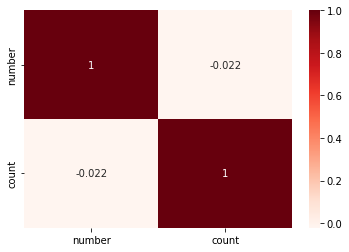

In [113]:
corr = data.corr()
sns.heatmap(corr, cmap="Reds", annot=True)

Построить какие-либо графики затруднительно, поскольку данные, в основном, не числовые и их большое количество, графики будут перегружены и неинформативны.

## 3.4 Объединение значений

В ходе просмотра будущего отклика классификации (столбец 'sourse') и опроса руководства производства/магазина был сделан вывод о том, что некоторые значения столбца подразумевают одно и то же. В итоге, было принято решение объединить некоторые значения и переименовать их.

Выводим список уникальных значений столбца 'sourse'.

In [114]:
data['sourse'].unique()

<StringArray>
[     'E-Mail',        'Инфо',    'Рассылка',      'Вотсап',      'Звонок',
        'Сайт',  'Мессенджер',   'Повторная', 'Маркетплейс',        'Сату',
         'Чат',      'Импарт',      'Маркет',       'Авито',         'Spl']
Length: 15, dtype: string

Производим переименование и объединение значений.

In [115]:
data['sourse'] = data['sourse'].replace({'Импарт': 'Маркетплейс', 'Сату': 'Маркетплейс', 'Маркет': 'Маркетплейс', 'Инфо': 'E-Mail', 'Вотсап': 'Мессенджер', 'Сайт': 'Чат на сайте', 'Spl': 'Маркетплейс', 'Чат':'Чат на сайте'})

Проверим значения и их общее количество.

In [116]:
data['sourse'].unique()

<StringArray>
[      'E-Mail',     'Рассылка',   'Мессенджер',       'Звонок',
 'Чат на сайте',    'Повторная',  'Маркетплейс',        'Авито']
Length: 8, dtype: string

In [117]:
data['sourse'].nunique()

8

Вернем столбцу строковый тип данных.

In [118]:
data['sourse'] = data['sourse'].astype("string")

In [119]:
data.dtypes

date                  datetime64[ns]
sourse                        string
number                       float64
company_name                  object
type_of_spare_part            string
part_num                      string
count                        float64
tg_№                          string
city                          string
dtype: object

## 3.5 Промежуточные выводы

Мы получили условно "чистый" датасет. Условность, как мне кажется, в рамках проекта допустима. В дальнейшем, при обучении моделей и выводе метрик,  будет видно, насколько такая степень очистки датасета допустима. Я намерено не удалял "некондиционные" значения из столбцов 'type_of_spare_part' и 'part_num'. В случае совсем плохих показаний метрик, попробуем уменьшить датасет. Очень сомневаюсь насчет решения присвоить всем пропускам в столбце 'city' значение "Иваново" (их получилось более 14 тысяч). Но эксперимент покажет.

Очень тяжело работать с неструктурированными данными (в одном столбце присутствуют названия, числовые коды, маркировка и тд.), которые имеют пропуски, не имеют между собой какой-либо связи (невозможно восстановить зависимости).

Для корректного сбора информации такого объема необходимо использовать соответствующие инструменты (желательно исключить ручное заполнение таблиц) и вводить ораничения для заполнения данных (по типам данных, количеству символов и проч.).

# 4 Создание моделей машинного обучения для мультиклассовой классификации

Задача раздела состоит в выборе оптимального алгоритма машинного обучения (с учителем) для определения класса (одного из 8-и). В качестве **целевого признака** будет выступать столбец 'sourse' датафрейма, который представляет собой точку входа в заказ (например редирект через объявление с Авито или Маркетплейса, или отклик на рассылку).


Классы представлены следующие:

0. Повторная;
1. Чат на сайте;
2. E-Mail;
3. Рассылка;
4. Маркетплейс;
5. Мессенджер;
6. Звонок;
7. Авито.

Для мультиклассовй классификации будут рассмотрены следующие методы машинного обучения:

1. KNN,
2. Логистическая Регрессия, 
3. SVM, 
4. ДПР, 
5. Случайный лес.



## 4.1 Подготовка данных

Посмотрим распределение значений целевого признака датасета по классам.

In [120]:
data['sourse'].value_counts()

Повторная       12777
Чат на сайте     2014
E-Mail           1844
Рассылка          104
Маркетплейс        42
Мессенджер         12
Звонок             10
Авито               7
Name: sourse, dtype: Int64

Оценим распределение по графику.

<AxesSubplot:>

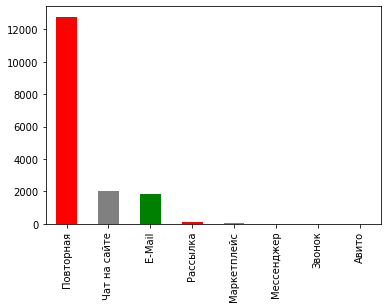

In [121]:
data.sourse.value_counts().sort_values(ascending=False).plot(kind = 'bar', color=['red', 'grey', 'green'])

Присвоим значениям целевого признака числовые значения от 0 до 7.

In [122]:
response = {'Повторная': '0', 'Чат на сайте': '1', 'E-Mail': '2', 'Авито':'7', 'Рассылка': '3',  'Маркетплейс': '4', 'Звонок': '6', 'Мессенджер': '5' }
response #Шпаргалка "Какое число за какой класс отвечает"

{'Повторная': '0',
 'Чат на сайте': '1',
 'E-Mail': '2',
 'Авито': '7',
 'Рассылка': '3',
 'Маркетплейс': '4',
 'Звонок': '6',
 'Мессенджер': '5'}

In [123]:
data['sourse'] = data['sourse'].replace(response)
data.sourse.unique()

<StringArray>
['2', '3', '5', '6', '1', '0', '4', '7']
Length: 8, dtype: string

In [124]:
data.sourse.value_counts() #Проверка, все ли значения соответствуют своим классам.

0    12777
1     2014
2     1844
3      104
4       42
5       12
6       10
7        7
Name: sourse, dtype: Int64

Поскольку таблица заполнялась поступательно от января к ноябрю 2022 года, мы перемешаем наш датасет.

In [125]:
data = shuffle(data).reset_index(drop=True)
data.head(5)

,date,sourse,number,company_name,type_of_spare_part,part_num,count,tg_№,city
0,2022-04-08,1,1439.0,Спецтех-Партс,Болт,1315/3712D,2.0,0,Иваново
1,2022-02-23,0,249.0,Титан Техника,Палец,3088754.0,1.0,Pz112,Иваново
2,2022-03-29,0,481.0,Поли Гарант,Палец,186-5662,1.0,Pc110,Ростов-На-Дону
3,2022-01-31,2,116.0,Автодоркомплект,Крестовина Поворотная,58040214,3.0,0,Иваново
4,2022-01-28,2,104.0,Фарго,Палец,208-70-61210,2.0,Pp144,Кемерово


Преобразуем данные (нормируем) в столбцах 'number' и 'count' - MinMaxScaler-ом (от 0 до 1).

In [126]:
scaler = MinMaxScaler(copy=False)
scaler.fit(data[['number', 'count']])
data[['number', 'count']] = scaler.transform(data[['number', 'count']])

Проверим, как нормализовались данные в столбцах 'number' и 'count'.

In [127]:
data[['number', 'count']].describe()

,number,count
count,16810.000000,16810.000000
mean,0.453490,0.003950
std,0.287886,0.017193
min,0.000000,0.000000
25%,0.189895,0.001000
50%,0.463415,0.002000
75%,0.679007,0.004000
max,1.000000,1.000000


In [128]:
data.head(3)

,date,sourse,number,company_name,type_of_spare_part,part_num,count,tg_№,city
0,2022-04-08,1,0.626307,Спецтех-Партс,Болт,1315/3712D,0.002,0,Иваново
1,2022-02-23,0,0.108014,Титан Техника,Палец,3088754.0,0.001,Pz112,Иваново
2,2022-03-29,0,0.209059,Поли Гарант,Палец,186-5662,0.001,Pc110,Ростов-На-Дону


Разделим датасет на предикторы и отклик, а также на тренировочную и тестовую выборки в пропорции 80/20.

In [129]:
X = data.drop('sourse', axis = 1) #Получим предикторы
y = data['sourse'] #Получим отклик

In [130]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y) #Обязательно стратифицировать выборки по целевому признаку.

In [131]:
for i in X_train, X_test, y_train, y_test:
  print(i.shape) #Выведем размерность всех блоков

(13448, 8)
(3362, 8)
(13448,)
(3362,)


Теперь можно преобразовать строковые данные OneHotEncoder-ом.

In [132]:
enc = OneHotEncoder(handle_unknown = 'ignore', sparse=False)
enc.fit(X_train)
X_train = enc.transform(X_train)
X_test = enc.transform(X_test)

In [133]:
X_train.shape #Размерность преобразованного тренировочного датасета

(13448, 12671)

In [134]:
X_test.shape #Размерность преобразованного тестового датасета

(3362, 12671)

## 4.2 Метод k-ближайших соседей

Проверим работу мутьтиклассового классификатора методом k-ближайших соседей.

In [135]:
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train,y_train)
y_pred_knn = knn_clf.predict(X_test)

Выведем метрики.

In [136]:
result_knn = confusion_matrix(y_test, y_pred_knn)
print('Confusion Matrix:')
print(result_knn)
result_1_knn = classification_report(y_test, y_pred_knn)
print()
print('Classification Report:')
print (result_1_knn)
result_2_knn = accuracy_score(y_test, y_pred_knn)
print()
print('Accuracy:', round(result_2_knn, 3))

Confusion Matrix:
[[2546    2    7    0    0    0    0    0]
 [  95  307    1    0    0    0    0    0]
 [  39    1  329    0    0    0    0    0]
 [   5    3    3   10    0    0    0    0]
 [   5    0    0    0    3    0    0    0]
 [   0    0    0    0    0    3    0    0]
 [   0    1    0    0    0    0    1    0]
 [   0    0    0    0    0    0    0    1]]

Classification Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97      2555
           1       0.98      0.76      0.86       403
           2       0.97      0.89      0.93       369
           3       1.00      0.48      0.65        21
           4       1.00      0.38      0.55         8
           5       1.00      1.00      1.00         3
           6       1.00      0.50      0.67         2
           7       1.00      1.00      1.00         1

    accuracy                           0.95      3362
   macro avg       0.99      0.75      0.83      3362
weighted avg     

При параметрах классификатора "по-умолчанию" метод показал себя весьма неплохо, Accuracy > 0.9. Попробуем изменить параметры модели принудительно (изменим n соседей, weights).

In [137]:
k_neib = []
weights = []
accuracy_knn = []
for n in [3,5,7,9]: #соседей 3...9
  for weight in ['uniform', 'distance']:
    knn_clf = KNeighborsClassifier(n_neighbors=n, weights=weight)
    knn_clf.fit(X_train,y_train)
    y_pred_knn = knn_clf.predict(X_test)
    k_neib.append(n)
    weights.append(weight)
    accuracy_knn.append(accuracy_score(y_test, y_pred_knn))

Выведем метрику accuracy в зависимости от параметров модели.

In [138]:
df_knn = pd.DataFrame(list(zip(k_neib, weights, accuracy_knn)),
               columns =['k_neib', 'weights', 'accuracy'])
df_knn.sort_values(by='accuracy', ascending=False).round(3)

,k_neib,weights,accuracy
1,3,distance,0.960
3,5,distance,0.958
0,3,uniform,0.958
2,5,uniform,0.952
5,7,distance,0.950
7,9,distance,0.947
4,7,uniform,0.945
6,9,uniform,0.941


<AxesSubplot:xlabel='weights', ylabel='k_neib'>

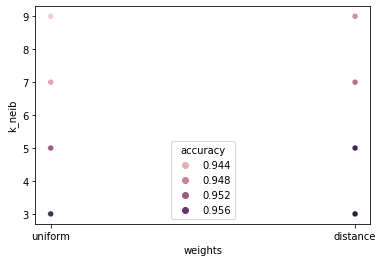

In [139]:
sns.scatterplot(data=df_knn, x="weights", y="k_neib", hue="accuracy")

Перебор параметров показал незначительное изменение параметра Accuracy. Возможно, увеличить показания метрик поможет более детальная чистка данных или их изменение.

## 4.3 Логистическая регрессия

Проверим работу мультиклассовой логистической регрессии.

In [140]:
lr = LogisticRegression(multi_class='multinomial',solver='lbfgs')
lr = lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

Выведем метрики.

In [141]:
result_lr = confusion_matrix(y_test, y_pred_lr)
print('Confusion Matrix:')
print(result_lr)
result_1_lr = classification_report(y_test, y_pred_lr)
print()
print('Classification Report:')
print (result_1_lr)
result_2_lr = accuracy_score(y_test, y_pred_lr)
print()
print('Accuracy:', round(result_2_lr, 3))

Confusion Matrix:
[[2550    5    0    0    0    0    0    0]
 [  42  361    0    0    0    0    0    0]
 [   2    0  367    0    0    0    0    0]
 [   1    1    0   19    0    0    0    0]
 [   6    0    0    0    2    0    0    0]
 [   0    0    0    0    0    3    0    0]
 [   0    0    1    0    0    0    1    0]
 [   0    1    0    0    0    0    0    0]]

Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      2555
           1       0.98      0.90      0.94       403
           2       1.00      0.99      1.00       369
           3       1.00      0.90      0.95        21
           4       1.00      0.25      0.40         8
           5       1.00      1.00      1.00         3
           6       1.00      0.50      0.67         2
           7       0.00      0.00      0.00         1

    accuracy                           0.98      3362
   macro avg       0.87      0.69      0.74      3362
weighted avg     

Очень хорошие показатели метрик accuracy и f1-score. Попробуем изменить параметры модели принудительно и проверим метрики.

In [142]:
multi_class_lr = []
solver_lr = []
accuracy = []
for multi_class in ['ovr', 'multinomial']:
    '''В документации сказано, что для большого количества данных хорошо подходят 'sag' и 'saga' (они быстрее обрабатывают большие массивы данных).'''
    for solver in ['lbfgs', 'sag', 'saga']:
        lr = LogisticRegression(multi_class=multi_class,solver=solver)
        lr = lr.fit(X_train, y_train)
        y_pred_lr = lr.predict(X_test)
        multi_class_lr.append(multi_class)
        solver_lr.append(solver)
        accuracy.append(accuracy_score(y_test, y_pred_lr))

Выведем метрику accuracy в зависимости от параметров модели.

In [143]:
df_lr = pd.DataFrame(list(zip(multi_class_lr, solver_lr, accuracy)),
               columns =['multi_class_lr', 'solver_lr', 'accuracy'])
df_lr.sort_values(by='accuracy', ascending=False).round(3)

,multi_class_lr,solver_lr,accuracy
3,multinomial,lbfgs,0.982
4,multinomial,sag,0.982
5,multinomial,saga,0.982
0,ovr,lbfgs,0.978
1,ovr,sag,0.978
2,ovr,saga,0.978


<AxesSubplot:xlabel='multi_class_lr', ylabel='solver_lr'>

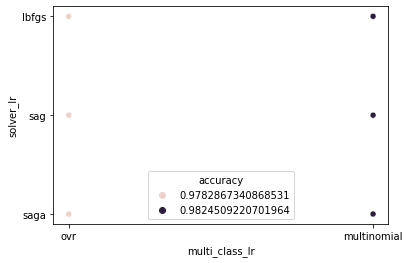

In [144]:
sns.scatterplot(data=df_lr, x="multi_class_lr", y="solver_lr", hue="accuracy")

Перебор параметров считался очень долго, в итоге accuracy оказался самым высоким у solver = 'lbfgs', который чаще всего используют в подобных задачах классификации.

## 4.4 Метод опорных векторов (SVM)

Проверим, как покажет себя метод опорных векторов в мультиклассовой классификации. В этот раз мы сразу начнем перебор параметров модели и выберем наилучшее сочетание. В качестве субалгоритма выберем LinearSVC. 

In [145]:
regularisation = []
loss_ = []
accuracy_lin_svm = []
penalty_ = []
for coef_of_reg in [0.1, 0.5, 1]:
    for loss in ['hinge', 'squared_hinge']:
        for penalty in ['l1', 'l2']:
            lin_svm_ = LinearSVC(C = 1).fit(X_train, y_train)
            y_pred_lin_smv = lin_svm_.predict(X_test)
            regularisation.append(coef_of_reg)
            loss_.append(loss)
            penalty_.append(penalty)
            accuracy_lin_svm.append(accuracy_score(y_test, y_pred_lin_smv))

Выведем метрику accuracy в зависимости от параметров модели.

In [146]:
df_lin_svm = pd.DataFrame(list(zip(regularisation, penalty_, loss_, accuracy_lin_svm)),
               columns =['regularisation', 'penalty', 'loss', 'accuracy'])
df_lin_svm.sort_values(by='accuracy', ascending=False).round(3)

,regularisation,penalty,loss,accuracy
0,0.1,l1,hinge,0.99
1,0.1,l2,hinge,0.99
2,0.1,l1,squared_hinge,0.99
3,0.1,l2,squared_hinge,0.99
4,0.5,l1,hinge,0.99
5,0.5,l2,hinge,0.99
6,0.5,l1,squared_hinge,0.99
7,0.5,l2,squared_hinge,0.99
8,1.0,l1,hinge,0.99
9,1.0,l2,hinge,0.99


Здесь даже график строить не нужно, т.к. видно, что accuracy не изменился. Но данный метод оказался самым быстрым из всех рассмотренных до текущего момента и с очень высоким accuracy. Выведем еще некоторые метрики.

In [147]:
result_lin_svm = confusion_matrix(y_test, y_pred_lin_smv)
print('Confusion Matrix:')
print(result_lin_svm)
result_1_lin_svm = classification_report(y_test, y_pred_lin_smv)
print()
print('Classification Report:')
print (result_1_lin_svm)
result_2_lin_svm = accuracy_score(y_test, y_pred_lin_smv)
print()
print('Accuracy:', round(result_2_lin_svm, 3))

Confusion Matrix:
[[2548    7    0    0    0    0    0    0]
 [  21  382    0    0    0    0    0    0]
 [   0    0  369    0    0    0    0    0]
 [   0    0    0   21    0    0    0    0]
 [   5    0    0    0    3    0    0    0]
 [   0    0    0    0    0    3    0    0]
 [   0    0    1    0    0    0    1    0]
 [   0    0    0    0    0    0    0    1]]

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2555
           1       0.98      0.95      0.96       403
           2       1.00      1.00      1.00       369
           3       1.00      1.00      1.00        21
           4       1.00      0.38      0.55         8
           5       1.00      1.00      1.00         3
           6       1.00      0.50      0.67         2
           7       1.00      1.00      1.00         1

    accuracy                           0.99      3362
   macro avg       1.00      0.85      0.90      3362
weighted avg     

## 4.5 Дерево принятия решений

Для проверки скорости работы алгоритма и оценки первичных метрик, протестируем алгоритм с параметрами, используемыми в учебных заданиях.

In [148]:
dtree = DecisionTreeClassifier(criterion='entropy', #критерий разделения
                              min_samples_leaf=20, #минимальное число объектов в листе
                              max_leaf_nodes=30, #максимальное число листьев
                              ).fit(X_train, y_train)
y_pred_dtree = dtree.predict(X_test)

Выведем метрики.

In [149]:
result_dtree = confusion_matrix(y_test, y_pred_dtree)
print('Confusion Matrix:')
print(result_dtree)
result_dtree_1 = classification_report(y_test, y_pred_dtree)
print()
print('Classification Report:')
print (result_dtree_1)
result_dtree_2 = accuracy_score(y_test, y_pred_dtree)
print()
print('Accuracy:', round(result_dtree_2, 3))

Confusion Matrix:
[[2555    0    0    0    0    0    0    0]
 [ 375   19    9    0    0    0    0    0]
 [  50    0  319    0    0    0    0    0]
 [  10    0   11    0    0    0    0    0]
 [   8    0    0    0    0    0    0    0]
 [   0    0    3    0    0    0    0    0]
 [   0    0    2    0    0    0    0    0]
 [   1    0    0    0    0    0    0    0]]

Classification Report:
              precision    recall  f1-score   support

           0       0.85      1.00      0.92      2555
           1       1.00      0.05      0.09       403
           2       0.93      0.86      0.89       369
           3       0.00      0.00      0.00        21
           4       0.00      0.00      0.00         8
           5       0.00      0.00      0.00         3
           6       0.00      0.00      0.00         2
           7       0.00      0.00      0.00         1

    accuracy                           0.86      3362
   macro avg       0.35      0.24      0.24      3362
weighted avg     

Дерево принятий решений показало результаты хуже, чем преджыдущие алгоритмы. Попробуем поменять параметры.

In [150]:
critetions = []
min_samples_leaf_ = []
accuracy_tree = []
max_leaf_nodes_ = []
for criterion in ['gini', 'entropy', 'log_loss']:
    for min_samples_leaf in [10, 20]:
        for max_leaf_node in [20, 30]:
            dtree = DecisionTreeClassifier(criterion=criterion,
                              min_samples_leaf=min_samples_leaf,
                              max_leaf_nodes=max_leaf_node).fit(X_train, y_train)
            y_pred_dtree = dtree.predict(X_test)
            critetions.append(criterion)
            min_samples_leaf_.append(min_samples_leaf)
            max_leaf_nodes_.append(max_leaf_node)
            accuracy_tree.append(accuracy_score(y_test, y_pred_dtree))

Выведем метрику accuracy в зависимости от параметров модели.

In [151]:
df_tree = pd.DataFrame(list(zip(critetions, min_samples_leaf_, max_leaf_nodes_, accuracy_tree)),
               columns =['critetions', 'min_samples_leaf', 'max_leaf_nodes', 'accuracy'])
df_tree.sort_values(by='accuracy', ascending=False).round(3)

,critetions,min_samples_leaf,max_leaf_nodes,accuracy
1,gini,10,30,0.882
3,gini,20,30,0.882
5,entropy,10,30,0.864
9,log_loss,10,30,0.864
7,entropy,20,30,0.860
11,log_loss,20,30,0.860
0,gini,10,20,0.860
2,gini,20,20,0.860
4,entropy,10,20,0.845
6,entropy,20,20,0.845


При переборе параметров метрика accuracy чуть возросла, но не критично.

## 4.6 Случайный лес

Случайный лес зарекомендовал себя как универсальный алгоритм, показывающий хорошие результаты. В задаче классификации принимается решение голосованием (деревьев) по большинству. Все деревья строятся независимо.

In [152]:
rand_forest = RandomForestRegressor(n_estimators=3, n_jobs=-1).fit(X_train, y_train)
y_pred_rand_forest = dtree.predict(X_test)

In [153]:
result_rand_forest = confusion_matrix(y_test, y_pred_rand_forest)
print('Confusion Matrix:')
print(result_rand_forest)
result_rand_forest_1 = classification_report(y_test, y_pred_rand_forest)
print()
print('Classification Report:')
print (result_rand_forest_1)
result_rand_forest_2 = accuracy_score(y_test, y_pred_rand_forest)
print()
print('Accuracy:', round(result_rand_forest_2, 3))

Confusion Matrix:
[[2555    0    0    0    0    0    0    0]
 [ 375   19    9    0    0    0    0    0]
 [  50    0  319    0    0    0    0    0]
 [  10    0   11    0    0    0    0    0]
 [   8    0    0    0    0    0    0    0]
 [   0    0    3    0    0    0    0    0]
 [   0    0    2    0    0    0    0    0]
 [   1    0    0    0    0    0    0    0]]

Classification Report:
              precision    recall  f1-score   support

           0       0.85      1.00      0.92      2555
           1       1.00      0.05      0.09       403
           2       0.93      0.86      0.89       369
           3       0.00      0.00      0.00        21
           4       0.00      0.00      0.00         8
           5       0.00      0.00      0.00         3
           6       0.00      0.00      0.00         2
           7       0.00      0.00      0.00         1

    accuracy                           0.86      3362
   macro avg       0.35      0.24      0.24      3362
weighted avg     

Удивительно, но на случайный лес возлагались самые большие надежды по метрикам качества, а оказалось, что они одни из самых низких. Кроме того, алгоритм очень медленный. 10 деревьев считались около часа, поэтому пришлось первичную прогонку сделать на трех деревьях. Попробуем изменить количество деревьев на 3, 5, 7 и минимальное число объектов в листе возьмем 5 и 10. Посмотрим на результат.

In [154]:
count_of_trees = []
samples_leafs = []
accuracy_forest = []
for trees in [3, 5, 7]:
    for min_samples_leaf in [5, 10]:
        rand_forest = RandomForestRegressor(n_estimators=trees, n_jobs=-1, min_samples_leaf=min_samples_leaf, max_leaf_nodes=30).fit(X_train, y_train)
        y_pred_rand_forest = dtree.predict(X_test)
        count_of_trees.append(trees)
        samples_leafs.append(min_samples_leaf)
        accuracy_forest.append(accuracy_score(y_test, y_pred_rand_forest))

Выведем метрику accuracy в зависимости от параметров модели.

In [155]:
df_forest = pd.DataFrame(list(zip(count_of_trees, samples_leafs, accuracy_forest)),
               columns =['count_of_trees', 'min_samples_leaf', 'accuracy'])
df_forest.sort_values(by='accuracy', ascending=False).round(3)

,count_of_trees,min_samples_leaf,accuracy
0,3,5,0.86
1,3,10,0.86
2,5,5,0.86
3,5,10,0.86
4,7,5,0.86
5,7,10,0.86


К сожалению, увеличение количества деревьев не привело к улучшению метрики accuracy.

# 5 Сравнение моделей и их метрик

Сформируем датасет из перечня алгоритмов и значений метрики accuracy по каждому алгоритму.

In [156]:
metrics_ = {'algorithm':['K-NN', 'Log_Regression', 'SVM', 'DecisionTree', 'RandomForest'], 'accuracy':[df_knn['accuracy'].max(), df_lr['accuracy'].max(), df_lin_svm['accuracy'].max(), df_tree['accuracy'].max(), df_forest['accuracy'].max()]}
metrics_ = pd.DataFrame.from_dict(metrics_)

Выведем алгоритмы в порядке убывания метрики accuracy.

In [157]:
metrics_ = metrics_.sort_values(by='accuracy', ascending=False)
metrics_

,algorithm,accuracy
2,SVM,0.989887
1,Log_Regression,0.982451
0,K-NN,0.959845
3,DecisionTree,0.881618
4,RandomForest,0.860500


Построим график.

[Text(0, 0, '0.9899'),
 Text(0, 0, '0.9825'),
 Text(0, 0, '0.9598'),
 Text(0, 0, '0.8816'),
 Text(0, 0, '0.8605')]

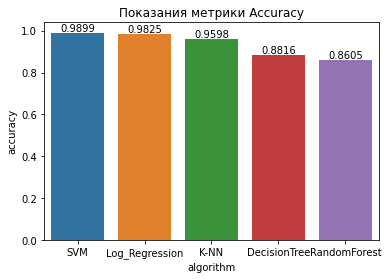

In [158]:
ax = sns.barplot(x="algorithm", y="accuracy", data=metrics_)
plt.title('Показания метрики Accuracy')
ax.bar_label(ax.containers[0], fmt= '%0.4f' )

Как видно из таблицы и графика, наилучшие показатели метрики качества accuracy у метода опорных векторов и логистической регрессии. Однако, метод опорных векторов помимо самой высокой метрики качества, показал еще и наименьшее время обучения модели, что делает его уверенным лидером в сравнении моделей. Неожиданно худшую метрику показал ансамблевый метод случайного леса, причем изменение количества деревьев результата не принесло. Возможно, при увеличении количества деревьев до 100, качество модели станет лучше, но это повлечет за собой значительное увеличение времени на обучение.

# 6 Итоги и выводы

В ходе выполнения данного проекта была выполнена большая работа по подготовке исходных данных, включающая в себя сбор, компановку и очистку. Данная процедура по временным затратам составляла если не 60%, то минимум половину всего времени. Причем это время именно ручной обработки данных. Исходные данные были самые что называется "живые", т.е. собраны человеком за относительно длительный промежуток времени (11 месяцев). Поскольку ввод таких данных был сильно "растянут" во времени и не был структурирован (не имел ограничений по вводу значений), имели место серьезные недостатки данных, такие как: большое количество пропусков, данные разных регистров, дубликаты, данные в некорректных столбцах и т.д. Ощутив на себе всю сложность очистки таких данных, могу сделать вывод, что сбор данных и их преобразование играет немаловажную роль во всей процедуре анализа данных. Теперь становится ясно, почему необходимо вводить автоматический сбор данных (особенно больших данных (Big Data)) и устанавливать ограничения по вводу данных в ячейки (ограничения по типу данных, количеству символов и проч.), а также постоянно следить за качеством аккумулируемых данных. 


Второй частью проекта была работа по решению бизнес-задачи, а именно разработка метода машинного обучения для мультиклассовой классификации. Требовалось предсказать точку входа в заказ интернет магазина (откуда придет клиент), опираясь на такие предикторы (уже имеющиеся данные) как город, компания, вид запчасти, количество и проч. В качестве алгоритмов были опробованы и сравнены между собой 5 основных алгоритмов классического машинного обучения с учителем, а именно: К-ближайших соседей, логистическая регрессия, метод опорных векторов, дерево принятия решений и бонусом - случайный лес. Признаюсь, я переживал за качество датасета и думал, что метрики качества accuracy по алгоритмам будут в районе 0.4-0.6, но я был приятно удивлен, когда на первом же опробованном методе (К-ближайших соседей) я получил хороший accuracy и f1-score. В то же время оказалась неприятной неожиданностью работа случайного леса, он обучался чуть ли не дольше всех, и показал самые плохие метрики (среди всех рассматриваемых алгоритмов). Предположу, что я не смог раскрыть весь потенциал этого алгоритма, потому что не до конца его изучил.


Во время прогонки всех моделей с различными параметрами заметно стала ощущаться скорость обучения алгоритмов. В учебных проектах размеры датасетов были небольшие (не берем в расчет Титаник с kaggle) и обучение длилось по несколько минут. Здесь же нередко получалось так, что модель обучается около часа, а в итоге выпадает в ошибку, потому что какие-то параметры не сочетаются между собой (о чем, конечно же, написано в документации).

По итогу сравнения пяти алгоритмов уверенным лидером вышел метод опорных векторов. Он показал самую высокую скорость обучения и самые высокие метрики качества. Для решения поставленной бизнес-задачи я бы использовал именно этот алгоритм.